In [0]:
#colorado_data - confirmed cases- weekly
#colorado_data1 - deaths in colorado - weekly
#data_confirmed - dataset with date and #Confirmed cases

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from datetime import datetime
import datetime
import operator 
import seaborn as sns
%matplotlib inline

In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')


In [0]:
denver_crime = pd.read_csv('crime.csv')
offense_codes = pd.read_csv('offense_codes.csv')

In [6]:
confirmed_df.head()
data=confirmed_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3'], axis=1)
data

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Central Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,17,17,20,21,21,21,21,22,22,22,23,23,23,24,25,25,26,27,27,27,28
3257,Southeast Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,7,7,7,7,8,11,12,13,13,14,12,13,15,11,11,12,12,12,13,13,13
3258,Southwest Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,70,70,70,76,81,83,87,89,91,93,98,101,103,111,119,121,128,132,138,155,164
3259,TriCounty,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,10,9,9,9,9,10,11,11,11,13,13,13,14,14,14,14,14,14,16,16


In [7]:
colorado_data = data.loc[data['Province_State'] == 'Colorado']
colorado_data


,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,181,212,260,294,354,367,388,417,417,475,543,647,693,726,726,758,805,860,915,915,996,1033,1082,1252,1302,1348,1391,1430,1490,1585,1665,1730,1780,1815,1883,1952,2046,2117,2205,2242
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,4,4,4,4,4,4,5,5,5,7,7,7,7,7,7,7,7,7,7,9,9,9,10,10,10,10,10,10,10,10,11,12,14,14,22,25,25,25,25
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,333,381,441,500,608,652,718,764,764,877,931,1083,1142,1183,1183,1243,1342,1419,1536,1536,1649,1717,1824,2030,2083,2160,2252,2312,2389,2472,2557,2625,2706,2758,2883,2977,3089,3148,3228,3272
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
253,Baca,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2,2,2,2,5,5,5,5,5,6,6,6,6,6,6,6,6,6,7,7,7,7,8,8,8,9,9,9,9,9,9
311,Weld,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,255,293,329,379,470,504,537,573,573,614,649,738,808,858,858,928,960,986,1063,1063,1180,1237,1263,1353,1430,1469,1544,1618,1704,1776,1802,1836,1872,1897,1955,1988,2042,2087,2120,2139
312,Yuma,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,4,5,6,6,6,6,7,8,8,9,8,9,9,9,9,10,10,10,11
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_df = colorado_data[['Admin2','Province_State','5/7/20']]
data_df
data_df.set_index('Admin2', inplace=True)


In [9]:
data1=deaths_df.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_','Combined_Key','iso2','iso3','Population'], axis=1)
data1

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,American Samoa,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,NaN,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,NaN,Puerto Rico,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107,108,111
4,NaN,Virgin Islands,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Central Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3257,Southeast Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3258,Southwest Utah,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3
3259,TriCounty,Utah,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
colorado_data1 = data1.loc[data['Province_State'] == 'Colorado']
colorado_data1

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
249,Adams,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,7,9,10,12,12,14,14,14,23,26,26,27,27,28,29,31,35,35,46,46,50,57,57,58,60,61,62,63,68,68,68,68,72,75,78,80,81,81
250,Alamosa,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,10,10,13,15,15,19,19,19,30,38,39,43,43,52,55,58,65,65,80,87,101,125,127,127,130,136,140,141,152,153,156,157,165,167,172,177,176,176
252,Archuleta,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,Baca,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,Weld,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,13,16,16,24,26,26,30,30,30,40,48,53,55,55,57,60,61,64,64,69,69,70,82,82,82,87,88,93,95,100,100,100,102,107,109,113,113,113,113
312,Yuma,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,Colorado,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [0]:
data_df1 = colorado_data1[['Admin2','Province_State','5/7/20']]
data_df1
data_df1.set_index('Admin2', inplace=True)

In [12]:
result = pd.merge(data_df, data_df1, on='Admin2')
result1 = result.drop(['Province_State_x'],axis=1)
result2 = result1.rename(columns={"5/7/20_x": "Confirmed", "5/7/20_y": "Deaths", "Province_State_y": "State"})
result2

,Confirmed,State,Deaths
Admin2,,,
Adams,2046,Colorado,78
Alamosa,25,Colorado,2
Arapahoe,3089,Colorado,172
Archuleta,8,Colorado,0
Baca,12,Colorado,0
...,...,...,...
Washington,9,Colorado,0
Weld,2042,Colorado,113
Yuma,10,Colorado,0


Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of confirmed COVID19 Cases')

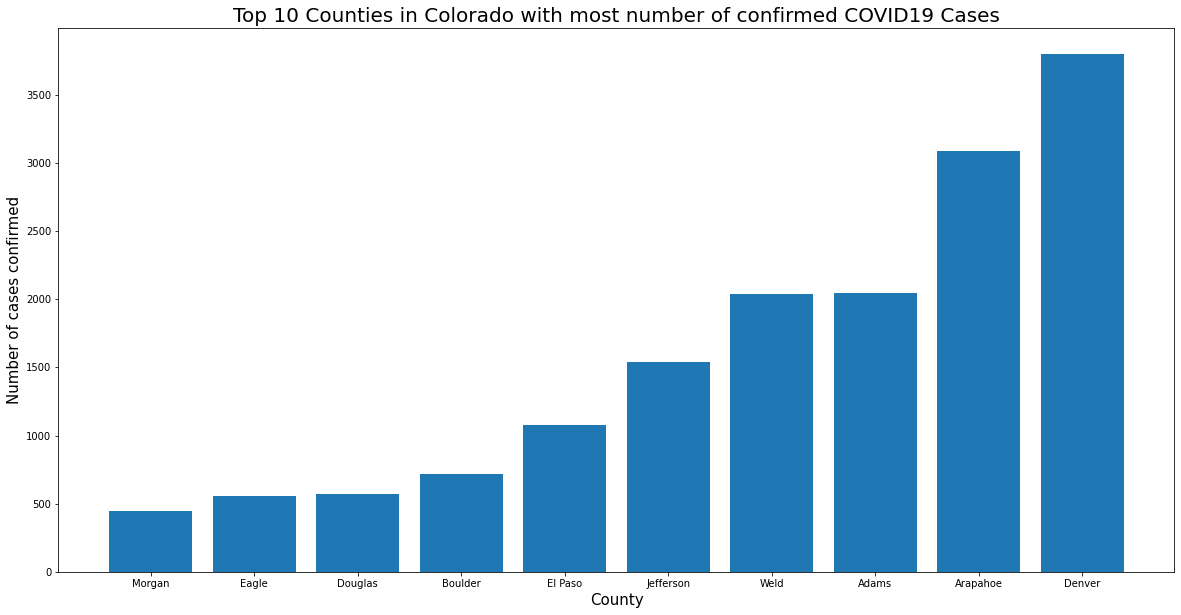

In [13]:
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Confirmed')["Confirmed"].index[-10:],result2.sort_values('Confirmed')["Confirmed"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of cases confirmed",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of confirmed COVID19 Cases",fontsize=20)

Text(0.5, 1.0, 'Top 10 Counties in Colorado with most number of COVID19 death Cases')

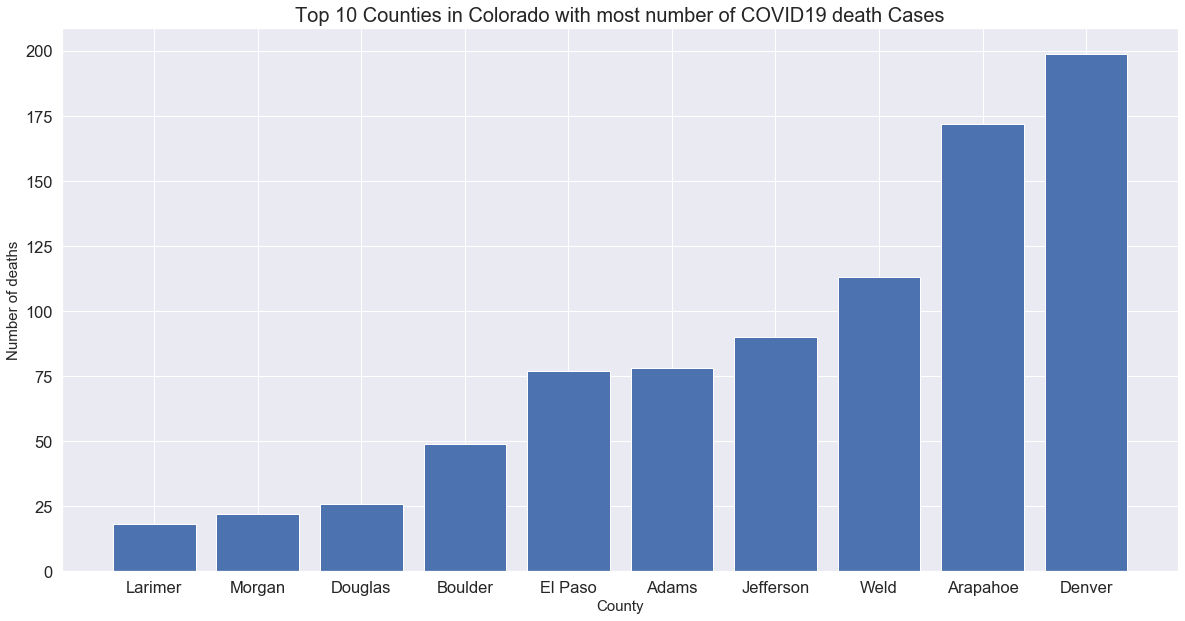

In [0]:
fig = plt.figure(figsize=(20,10))
plt.bar(result2.sort_values('Deaths')["Deaths"].index[-10:],result2.sort_values('Deaths')["Deaths"].values[-10:],)
plt.xlabel("County",fontsize=15)
plt.ylabel("Number of deaths",fontsize=15)
plt.title("Top 10 Counties in Colorado with most number of COVID19 death Cases",fontsize=20)

In [0]:
denver_crime=denver_crime.dropna(subset=['GEO_LAT','GEO_LON'])
denver_crime.isnull().sum()


INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      326315
REPORTED_DATE                  0
INCIDENT_ADDRESS           41065
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [0]:
denver_crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,4/12/2020 6:52:00 PM,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,3168520.0,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,4/8/2020 7:00:00 AM,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,3145106.0,1708264.0,-104.983742,39.776860,1,112,globeville,1,0
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,4/11/2020 7:26:00 PM,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,3183651.0,1709929.0,-104.846569,39.780749,5,521,montbello,1,0
480283,2020220574,2020220574091200,912,0,homicide-other,murder,4/11/2020 7:58:00 PM,NaN,4/11/2020 9:22:00 PM,NaN,3128353.0,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0


In [0]:
denver_crime.OFFENSE_CATEGORY_ID.unique()

array(['larceny', 'traffic-accident', 'all-other-crimes',
       'public-disorder', 'theft-from-motor-vehicle', 'burglary',
       'other-crimes-against-persons', 'drug-alcohol',
       'white-collar-crime', 'auto-theft', 'robbery',
       'aggravated-assault', 'murder', 'arson'], dtype=object)

In [0]:
offense_codes.OFFENSE_CATEGORY_ID.unique()


array(['all-other-crimes', 'public-disorder', 'drug-alcohol',
       'sexual-assault', 'other-crimes-against-persons',
       'white-collar-crime', 'traffic-accident', 'murder', 'robbery',
       'aggravated-assault', 'arson', 'burglary', 'larceny',
       'theft-from-motor-vehicle', 'auto-theft'], dtype=object)

In [0]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                124198
all-other-crimes                 85969
larceny                          48577
public-disorder                  48483
theft-from-motor-vehicle         38639
drug-alcohol                     30253
auto-theft                       27116
other-crimes-against-persons     23696
burglary                         23388
aggravated-assault               11916
white-collar-crime                6748
robbery                           6257
arson                              569
murder                             312
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [0]:
denver_crime.dtypes

INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                     float64
GEO_Y                     float64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                 int64
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

In [0]:
denver_crime.FIRST_OCCURRENCE_DATE = pd.to_datetime(denver_crime.FIRST_OCCURRENCE_DATE)
denver_crime["YEAR"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.year
#df["DAY"] = df.FIRST_OCCURRENCE_DATE.dt.day
#df["DAY_OF_WEEK"] = df.FIRST_OCCURRENCE_DATE.dt.dayofweek
denver_crime["MONTH"] = denver_crime.FIRST_OCCURRENCE_DATE.dt.month
#df["HOUR"] = df.FIRST_OCCURRENCE_DATE.dt.hour
denver_crime


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [0]:
denver_crime = denver_crime[denver_crime.YEAR != 2018]
denver_crime = denver_crime[denver_crime.YEAR != 2017]
denver_crime = denver_crime[denver_crime.YEAR != 2016]
denver_crime = denver_crime[denver_crime.YEAR != 2015]
denver_crime = denver_crime[denver_crime.YEAR != 2019]
denver_crime



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [0]:
data_after_april = denver_crime.copy()
data_after_april = data_after_april[data_after_april.MONTH != 1]
data_after_april = data_after_april[data_after_april.MONTH != 2]
data_after_april = data_after_april[data_after_april.MONTH != 3]

data_after_april



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
455524,2020209855,2020209855230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-04-06 18:00:00,4/7/2020 3:30:00 AM,4/7/2020 4:06:00 AM,5100 BLK W ALASKA PL,...,1683399.0,-105.052611,39.708881,4,412,westwood,1,0,2020,4
455623,2020203412,2020203412570700,5707,0,criminal-trespassing,all-other-crimes,2020-04-04 02:01:00,NaN,4/4/2020 5:09:00 AM,150 W 9TH AVE,...,1690969.0,-104.989805,39.729407,6,611,civic-center,1,0,2020,4
456227,2020208240,2020208240120500,1205,0,robbery-street,robbery,2020-04-06 11:30:00,NaN,4/6/2020 11:35:00 AM,3390 W ALAMEDA AVE,...,1684184.0,-105.031111,39.710952,4,412,westwood,1,0,2020,4
457484,2020215694,2020215694544100,5441,0,traffic-accident,traffic-accident,2020-04-09 16:29:00,NaN,4/9/2020 5:42:00 PM,300 BLOCK S KALAMATH ST,...,1683921.0,-104.997438,39.710091,3,312,baker,0,1,2020,4
458807,2020207478,2020207478239900,2399,0,theft-other,larceny,2020-04-06 00:42:00,NaN,4/6/2020 1:31:00 AM,1690 N PEARL ST,...,1695943.0,-104.979603,39.743017,6,621,north-capitol-hill,1,0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


In [0]:
#Addition test
data_after_april_test = denver_crime.copy()
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 1]
data_after_april_test = data_after_april_test[data_after_april_test.MONTH != 2]


data_after_april_test

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
1149,2020137723,2020137723544100,5441,0,traffic-accident,traffic-accident,2020-03-03 13:50:00,NaN,3/3/2020 3:31:00 PM,W ALAMEDA AVE / S CLAY ST,...,1684278.0,-105.020336,39.711167,4,412,athmar-park,0,1,2020,3
2790,2020132689,2020132689260401,2604,1,fraud-criminal-impersonation,white-collar-crime,2020-03-01 03:20:00,NaN,3/1/2020 4:50:00 AM,1600 BLK N BROADWAY ST,...,1695752.0,-104.987860,39.742529,6,611,cbd,1,0,2020,3
2984,2020137637,2020137637357200,3572,0,drug-methampetamine-possess,drug-alcohol,2020-03-03 13:48:00,NaN,3/3/2020 2:23:00 PM,17TH ST / CHESTNUT PL,...,1700178.0,-105.002407,39.754742,6,612,union-station,1,0,2020,3
5207,2020135919,2020135919230300,2303,0,theft-shoplift,larceny,2020-03-02 17:27:00,NaN,3/2/2020 5:56:00 PM,2950 W EVANS AVE,...,1672276.0,-105.023673,39.678231,4,422,college-view-south-platte,1,0,2020,3
5281,2020138616,2020138616570700,5707,0,criminal-trespassing,all-other-crimes,2020-03-03 21:22:00,NaN,3/3/2020 11:08:00 PM,1576 N SHERMAN ST,...,1695365.0,-104.984490,39.741452,6,621,north-capitol-hill,1,0,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480280,2020222218,2020222218250300,2503,0,forgery-counterfeit-of-obj,white-collar-crime,2020-04-12 18:52:00,NaN,4/12/2020 10:45:00 PM,4900 S SYRACUSE ST,...,1653688.0,-104.901721,39.626643,3,324,hampden-south,1,0,2020,4
480281,2020212778,2020212778240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-08 07:00:00,NaN,4/8/2020 12:15:00 PM,4400 BLK N GRANT ST,...,1708264.0,-104.983742,39.776860,1,112,globeville,1,0,2020,4
480282,2020220528,2020220528230300,2303,0,theft-shoplift,larceny,2020-04-11 19:26:00,NaN,4/11/2020 7:53:00 PM,4650 N PEORIA ST,...,1709929.0,-104.846569,39.780749,5,521,montbello,1,0,2020,4
480283,2020220574,2020220574091200,912,0,homicide-other,murder,2020-04-11 19:58:00,NaN,4/11/2020 9:22:00 PM,NaN,...,1675820.0,-105.043925,39.688041,4,421,mar-lee,1,0,2020,4


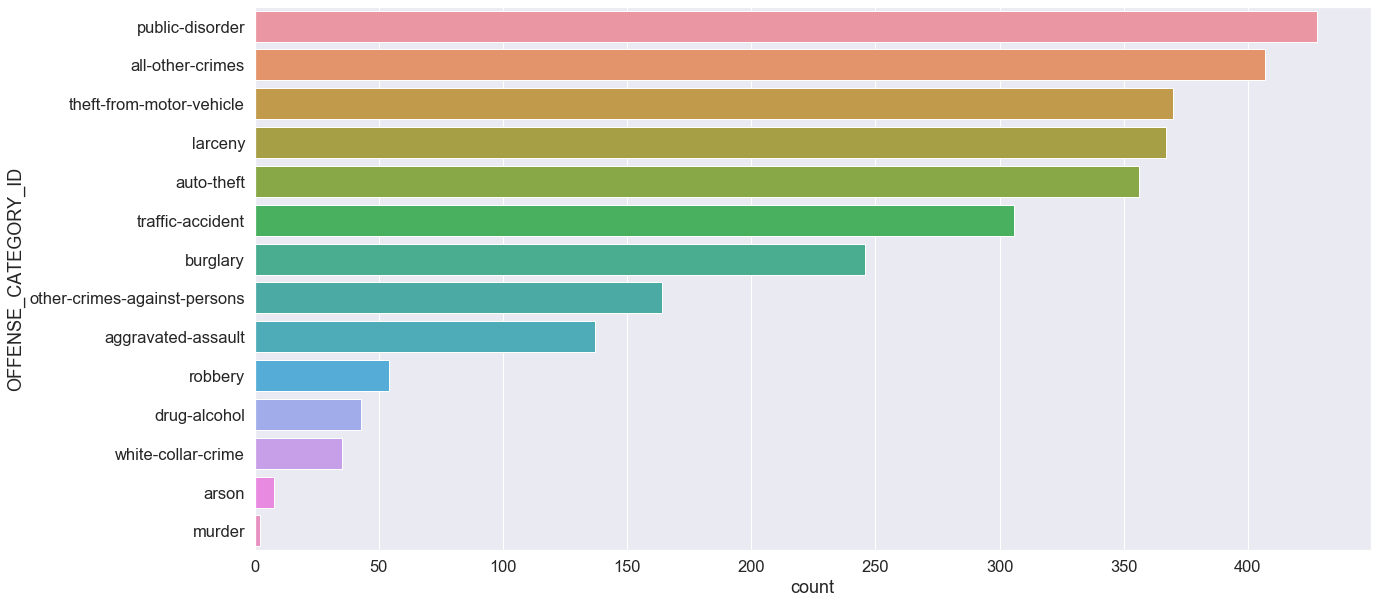

In [0]:
plt.figure(figsize=(20,10))
category_frequency1 = data_after_april.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=data_after_april, order=category_frequency1.index)

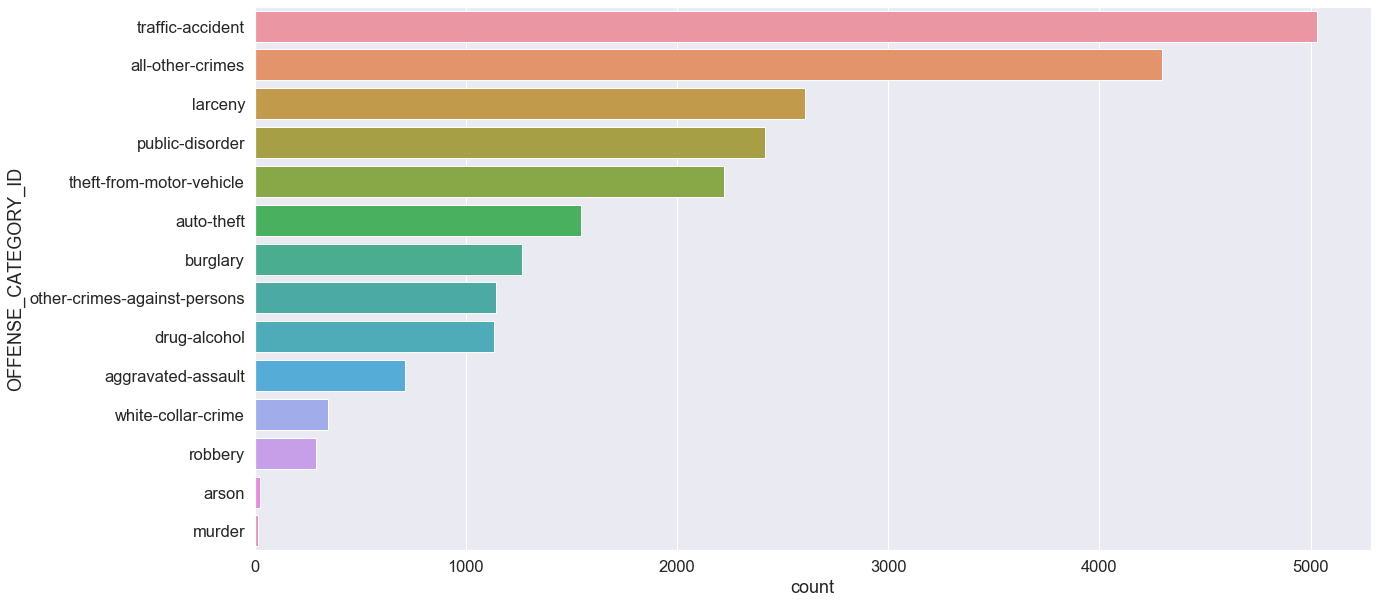

In [0]:
plt.figure(figsize=(20,10))
category_frequency = denver_crime.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=denver_crime, order=category_frequency.index)

In [0]:
is_crime = denver_crime[denver_crime.IS_CRIME==1]
is_traffic = denver_crime[denver_crime.IS_TRAFFIC==1]


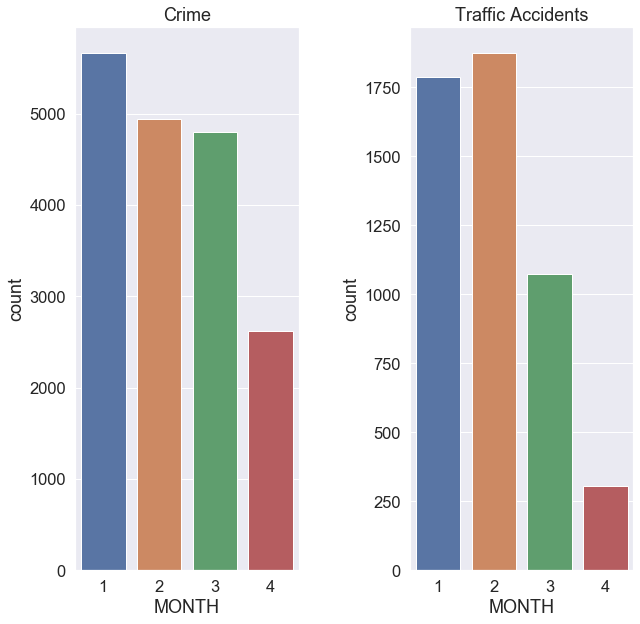

In [0]:
x, axes = plt.subplots(1,2)
x.set_figheight(10)
x.set_figwidth(10)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="MONTH", data=is_crime,ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="MONTH", data=is_traffic,ax=axes[1])

In [0]:
pearsoncorr = denver_crime.corr(method='pearson')

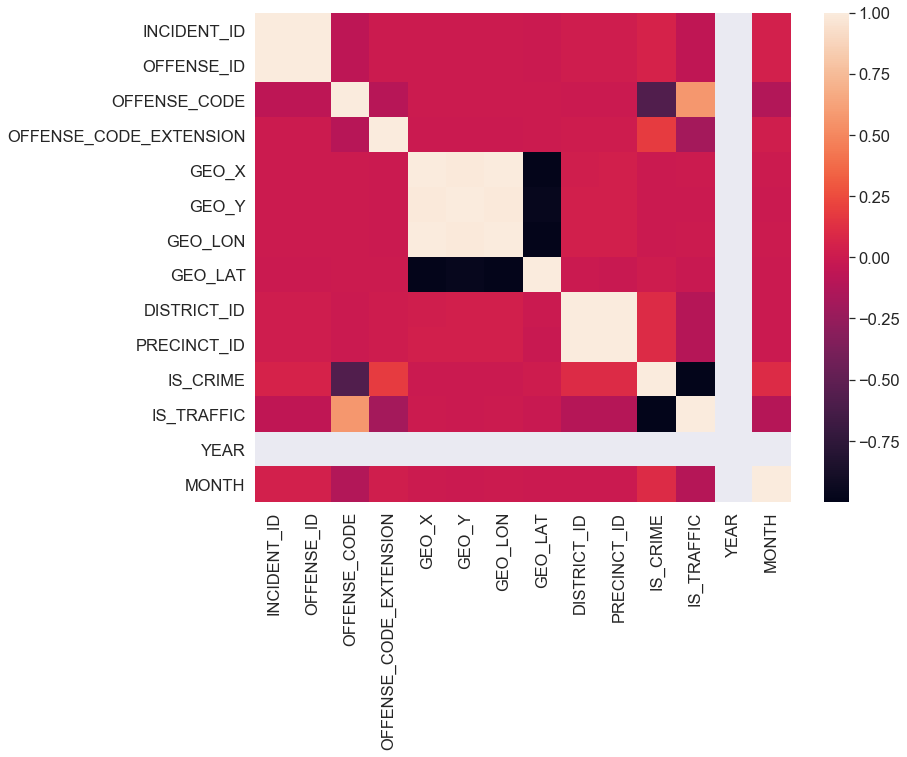

In [0]:
plt.figure(figsize=(12, 9))
sns.heatmap(pearsoncorr)

In [0]:
denver_crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH
20,2020131877,2020131877570700,5707,0,criminal-trespassing,all-other-crimes,2020-02-29 20:15:00,NaN,2/29/2020 9:16:00 PM,2222 LAWRENCE ST,...,1700184.0,-104.988366,39.754698,6,611,five-points,1,0,2020,2
71,2020121279,2020121279544100,5441,0,traffic-accident,traffic-accident,2020-02-25 11:00:00,NaN,2/25/2020 11:02:00 AM,E 9TH AVE / N OGDEN ST,...,1691372.0,-104.975266,39.730449,6,623,capitol-hill,0,1,2020,2
99,202029783,202029783230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-01-13 23:00:00,1/14/2020 5:00:00 AM,1/14/2020 11:07:00 AM,1900 BLK W PACIFIC PL,...,1672896.0,-105.010399,39.679879,4,422,college-view-south-platte,1,0,2020,1
135,202043098,202043098521201,5212,1,weapon-by-prev-offender-powpo,all-other-crimes,2020-01-20 02:02:00,NaN,1/20/2020 3:36:00 AM,2100 BLOCK ARAPAHOE ST,...,1699548.0,-104.988962,39.752955,6,611,five-points,1,0,2020,1
156,202046559,202046559230300,2303,0,theft-shoplift,larceny,2020-01-21 15:43:00,NaN,1/21/2020 5:13:00 PM,8298 E NORTHFIELD BLVD,...,1711073.0,-104.891880,39.784132,5,511,stapleton,1,0,2020,1


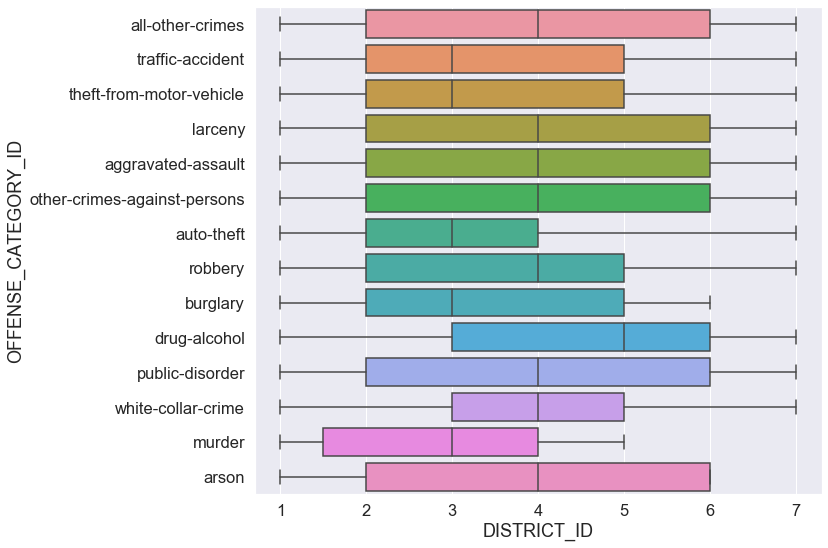

In [0]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); sns.boxplot(x='DISTRICT_ID', y='OFFENSE_CATEGORY_ID', data=denver_crime[['DISTRICT_ID', 'OFFENSE_CATEGORY_ID']])
plt.tight_layout()
plt.show()

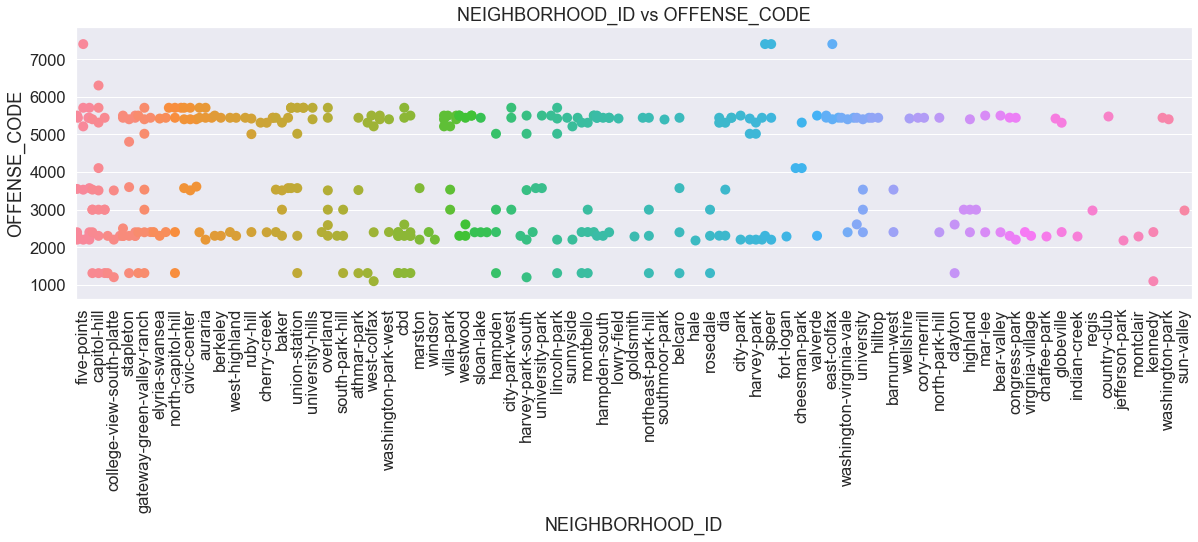

In [0]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x='NEIGHBORHOOD_ID', y='OFFENSE_CODE', data=denver_crime.head(350), size =10)
plt.xticks(rotation=90)
plt.title('NEIGHBORHOOD_ID vs OFFENSE_CODE')
plt.show()

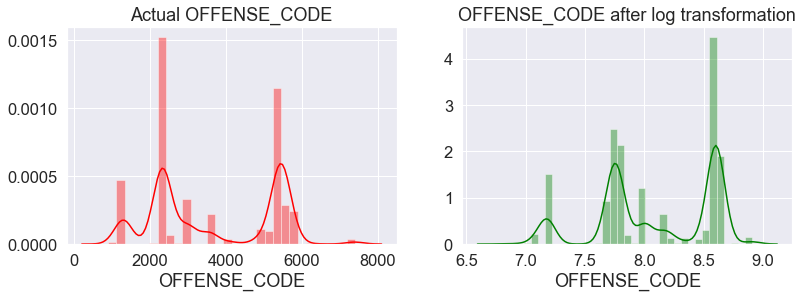

In [0]:
figure = plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
sns.distplot(denver_crime.OFFENSE_CODE, color = 'red')
plt.title('Actual OFFENSE_CODE')
plt.subplot(1,2,2)
sns.distplot(np.log(denver_crime.OFFENSE_CODE), color = 'green')
plt.title('OFFENSE_CODE after log transformation')
plt.show()

In [14]:
########################################################################
############################inference1##################################
#Addition test
colorado_data.drop('Province_State',axis=1,inplace= True)
colorado_data.drop('Country_Region',axis=1,inplace=True)
colorado_data1.drop('Province_State',axis=1,inplace= True)
colorado_data1.drop('Country_Region',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Confirmed Cases
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
106,5/6/20,17832
107,5/7/20,18370
108,5/8/20,18827
109,5/9/20,19375


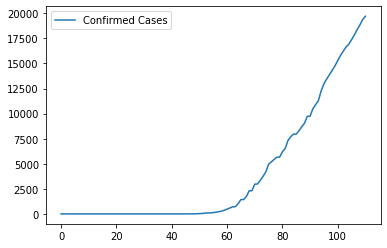

In [15]:

df1=colorado_data.sum()
df= df1.T
df=df[1:]
df.to_csv("date_confirmed.csv")
total_df= pd.read_csv("date_confirmed.csv",sep=",",names=['Date','Confirmed Cases'])
total_df.plot()
date_confirmed= total_df
date_confirmed
#change date format




In [16]:
#Addition test
df_2=colorado_data1.sum()
df_3= df_2.T
df_3=df_3[1:]
df_3.to_csv("date_deaths.csv")
total_df_2= pd.read_csv("date_deaths.csv",sep=",",names=['Date','Deaths'])
date_deaths= total_df_2
date_deaths

#change date format





,Date,Deaths
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
106,5/6/20,919
107,5/7/20,944
108,5/8/20,960
109,5/9/20,967


In [17]:
colorado_data1


,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
249,Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,7,9,10,12,12,14,14,14,23,26,26,27,27,28,29,31,35,35,46,46,50,57,57,58,60,61,62,63,68,68,68,68,72,75,78,80,81,81
250,Alamosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
251,Arapahoe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,10,10,13,15,15,19,19,19,30,38,39,43,43,52,55,58,65,65,80,87,101,125,127,127,130,136,140,141,152,153,156,157,165,167,172,177,176,176
252,Archuleta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,Baca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,Weld,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,13,16,16,24,26,26,30,30,30,40,48,53,55,55,57,60,61,64,64,69,69,70,82,82,82,87,88,93,95,100,100,100,102,107,109,113,113,113,113
312,Yuma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3154,Out of CO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
total_df['Date']=pd.to_datetime(total_df['Date'])
total_df.set_index('Date', inplace=True)


In [19]:
decomposed = seasonal_decompose(total_df['Confirmed Cases'], model='additive')
x =decomposed.plot()

ValueError: ignored

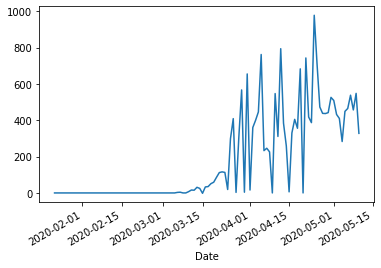

In [20]:
total_df['stationary']=total_df['Confirmed Cases'].diff()
total_df['stationary'].plot()

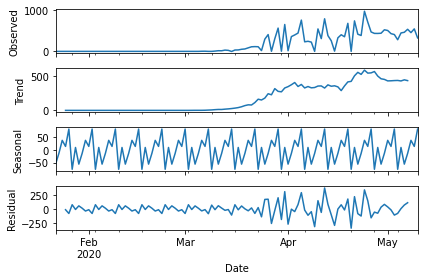

In [21]:
decomposed = seasonal_decompose(total_df['stationary'].dropna(), model='additive')
x =decomposed.plot()

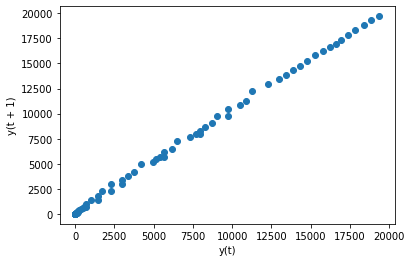

In [22]:
pd.plotting.lag_plot(total_df['Confirmed Cases'])

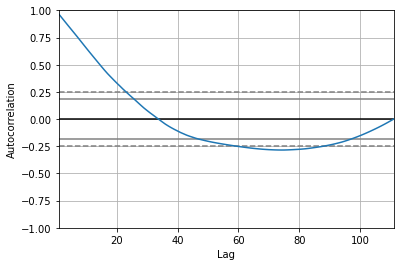

In [23]:
pd.plotting.autocorrelation_plot(total_df['Confirmed Cases'])

In [24]:
tdf=total_df.tail(29)

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
X = tdf['stationary'].dropna()

train_data = X[:22]
test_data = X[X[22:]]

len(test_data)

7

In [0]:
#need to calculate MAPE
#MSE
#EWMA CALCULATION
#CHECK HOW TO SET P VALUE FOR AR
#DO AR
#WHAT IS EWMA?

In [25]:
#inference 2
import numpy as np
import math
last2weeks=date_confirmed.tail(14)
seclast_week =last2weeks.head(7)
last_week= last2weeks.tail(7)
X_mean = last_week["Confirmed Cases"].mean(axis=0)
mean_o = seclast_week['Confirmed Cases'].mean(axis=0)
std_dev= date_confirmed["Confirmed Cases"].std(axis=0)
nroot =math.sqrt(len(date_confirmed))
Z= (X_mean - mean_o)/ (std_dev/nroot)
threshold= 1.96

#ONE SAMPLE Z TEST
if(abs(Z)> threshold):
    print("Ho is rejected with absolute value of T  as",abs(Z))
else:
    print("Ho is rejected with absolute value of T  as",abs(Z))

    


Ho is rejected with absolute value of T  as 5.395078864860921


In [26]:
#TWO SAMPLED T TEST

#paired
D=[]
weekSL= seclast_week['Confirmed Cases']. values. tolist()
weekL= last_week['Confirmed Cases']. values. tolist()
for i in range(len(weekSL)):
    D.append(weekL[i]-weekSL[i])
Dmean= (sum(D)/len(D))
T= Dmean/(std_dev/math.sqrt(len(D)))

if(abs(T)> threshold):
    print("Ho is rejected with absolute value of T  as",abs(T))
else:
    print("Ho is rejected with absolute value of T  as",abs(T))


Ho is rejected with absolute value of T  as 1.3548316331236363


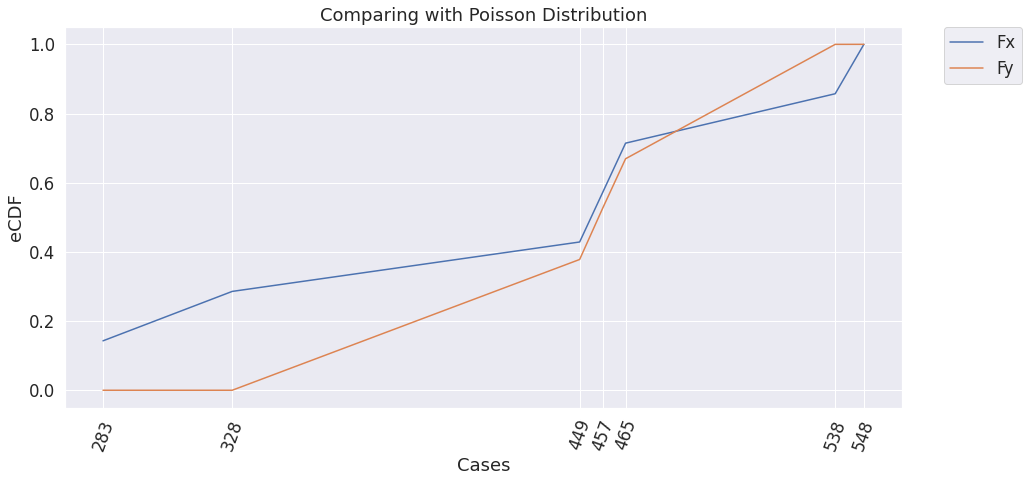

       x            Fy       Fx-       Fx+        Fy-Fx-    Fy-Fx+
0  283.0  1.749239e-18  0.000000  0.142857  1.749239e-18  0.142857
1  328.0  1.566995e-10  0.142857  0.285714  1.428571e-01  0.285714
2  449.0  3.780375e-01  0.285714  0.428571  9.232325e-02  0.050534
3  457.0  5.257626e-01  0.428571  0.571429  9.719115e-02  0.045666
4  465.0  6.691988e-01  0.571429  0.714286  9.777026e-02  0.045087
5  538.0  9.999111e-01  0.714286  0.857143  2.856254e-01  0.142768
6  548.0  9.999861e-01  0.857143  1.000000  1.428432e-01  0.000014
Ho is rejected as D is  0.28571428555758616  (given C = 0.05)


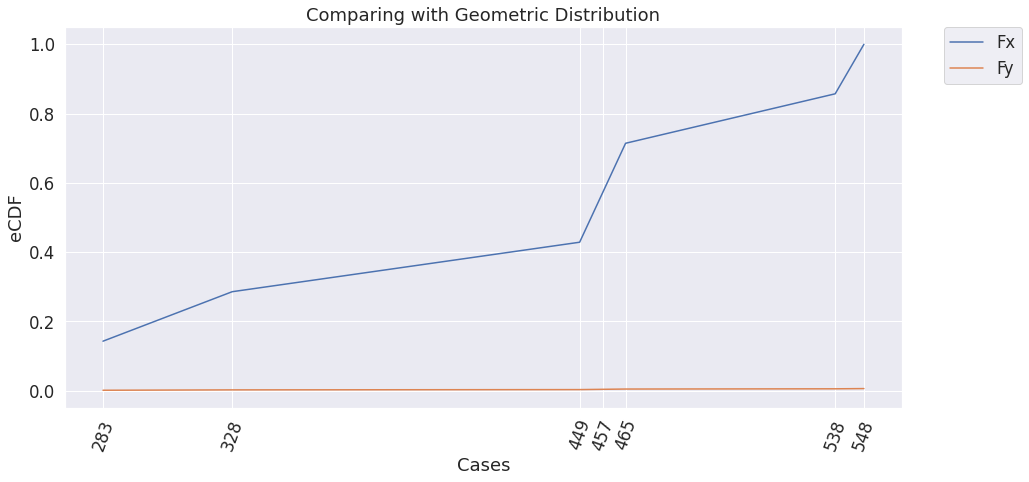

       x        Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  283.0  0.001180  0.000000  0.142857  0.001180  0.141677
1  328.0  0.002250  0.142857  0.285714  0.140607  0.283464
2  449.0  0.003070  0.285714  0.428571  0.282644  0.425501
3  457.0  0.003876  0.428571  0.571429  0.424695  0.567553
4  465.0  0.004668  0.571429  0.714286  0.566761  0.709618
5  538.0  0.005342  0.714286  0.857143  0.708943  0.851800
6  548.0  0.006003  0.857143  1.000000  0.851140  0.993997
Ho is rejected as D is  0.9939974850643241  (given C = 0.05)
456.2857142857143 1611.6326530612246
n=  -180.20271320568077 p=  -2.5320690580552823
looking at estomated n and p values we can clearly see that this data would not be a good fit for binomial


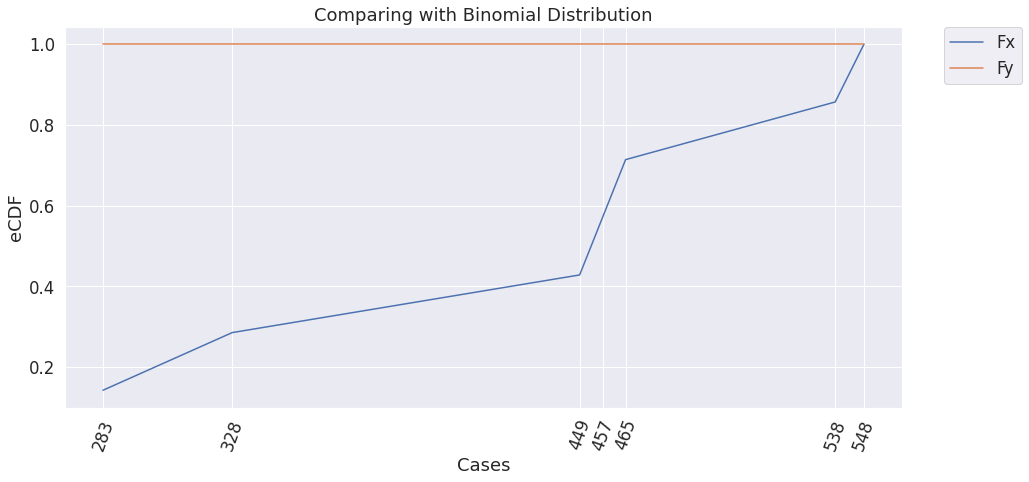

       x   Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  283.0  1.0  0.000000  0.142857  1.000000  0.857143
1  328.0  1.0  0.142857  0.285714  0.857143  0.714286
2  449.0  1.0  0.285714  0.428571  0.714286  0.571429
3  457.0  1.0  0.428571  0.571429  0.571429  0.428571
4  465.0  1.0  0.571429  0.714286  0.428571  0.285714
5  538.0  1.0  0.714286  0.857143  0.285714  0.142857
6  548.0  1.0  0.857143  1.000000  0.142857  0.000000
Ho is rejected as D is  1.0  (given C = 0.05)


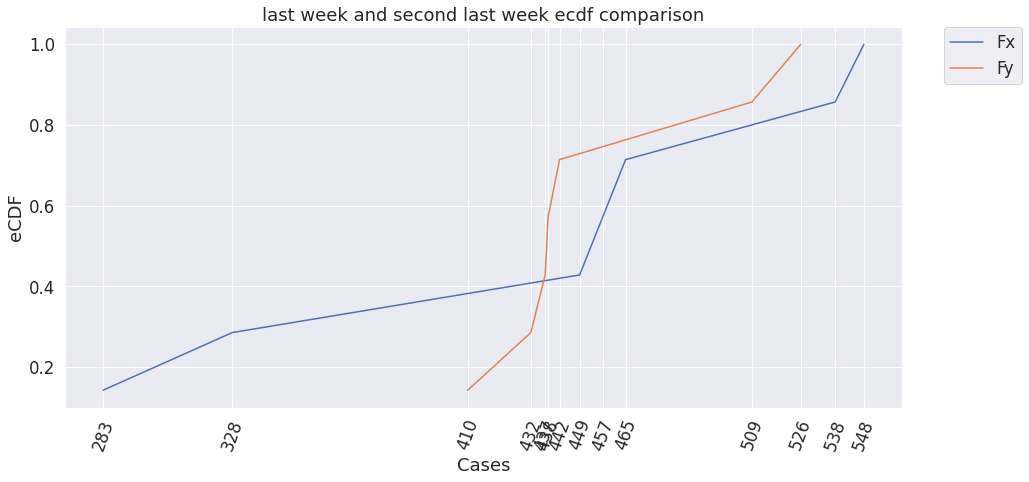

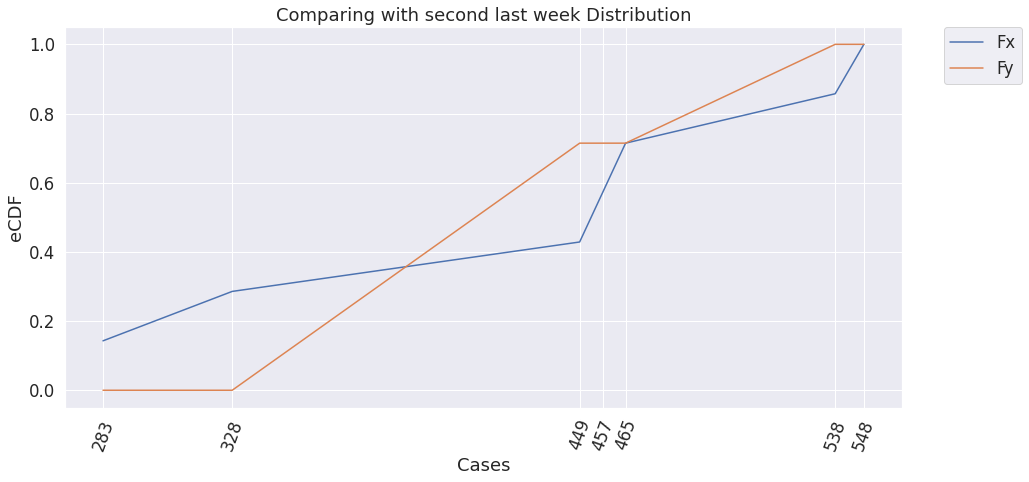

       x        Fy       Fx-       Fx+    Fy-Fx-    Fy-Fx+
0  283.0  0.000000  0.000000  0.142857  0.000000  0.142857
1  328.0  0.000000  0.142857  0.285714  0.142857  0.285714
2  449.0  0.714286  0.285714  0.428571  0.428571  0.285714
3  457.0  0.714286  0.428571  0.571429  0.285714  0.142857
4  465.0  0.714286  0.571429  0.714286  0.142857  0.000000
5  538.0  1.000000  0.714286  0.857143  0.285714  0.142857
6  548.0  1.000000  0.857143  1.000000  0.142857  0.000000
Ho is rejected as D is  0.4285714285714286  (given C = 0.05)
****** Please scroll up to see all graphs and analysis of KS test ******


In [28]:
##############################################INFERENCE3(KS TEST and PERMUTATION TEST)########################
#K-S test 
import numpy as np
import math
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import binom

def plotvalues(Fy, y, Fx, x, title, xvals):
  plt.figure(figsize=(15,7))
  sns.set(font_scale=1.5)
  plt.tight_layout()
  plt.plot(x, Fx, label="Fx")
  plt.plot(y, Fy, label="Fy")
  plt.xlabel('Cases')
  plt.ylabel('eCDF')
  plt.xticks(xvals, rotation="70")
  plt.title(title)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()
  

def kstest(Fy, last_week_confirmed, C, title):

  Fx = [0]

  for i in last_week_confirmed:
    cdf = len([k for k in last_week_confirmed if k <= i]) / len(last_week_confirmed)
    Fx.append(cdf)

  plotvalues(Fy, last_week_confirmed,  Fx[1:], last_week_confirmed, title, last_week_confirmed)

  ks_df = pd.DataFrame()
  ks_df["x"] = last_week_confirmed
  ks_df["Fy"] = Fy
  ks_df["Fx-"] = Fx[:-1]
  ks_df["Fx+"] = Fx[1:]
  ks_df["Fy-Fx-"] = abs(ks_df["Fy"] - ks_df["Fx-"])
  ks_df["Fy-Fx+"] = abs(ks_df["Fy"] - ks_df["Fx+"])
  print(ks_df)

  D = max(ks_df["Fy-Fx-"].max(),ks_df["Fy-Fx+"].max())

  if D > C:
    print("Ho is rejected as D is ", D, " (given C = 0.05)")
  else:
    print("Ho is accepted as D is ", D, " (given C = 0.05)")

def cdf_calc(fx):
  Fx = [fx[0]]
  for i in range(1, len(fx)):
    Fx.append(fx[i]+Fx[i-1])
  return Fx

#Poisson 

def poisson_cdf(last_week_confirmed, pois_lambda):
  # fx = []
  # for i in last_week_confirmed:
  #   num1 = math.pow(pois_lambda,x)
  #   num2 = (math.exp(-pois_lambda))
  #   num = num1 * num2
  #   denom = math.factorial(x)
  #   fx.append(num/denom)

  # cdf = cdf_calc(fx)
  # return cdf
  Fx = []

  for i in last_week_confirmed:
    Fx.append(poisson.cdf(i, pois_lambda))
  return Fx

def geom_cdf(last_week_confirmed, p):
  fx = []
  for i in last_week_confirmed:
    val = ((1-p)**(i-1)) * p
    fx.append(val)
  Fx = cdf_calc(fx)
  return Fx


def binom_cdf(last_week_confirmed, n, p):
  Fx = []

  for i in last_week_confirmed:
    Fx.append(binom.cdf(i, n, p))
  return Fx

last2weeks=date_confirmed.tail(14)
seclast_week =last2weeks.head(7)
last_week= last2weeks.tail(7)

seclast_week_confirmed = sorted(seclast_week['stationary'])
last_week_confirmed = sorted(last_week['stationary'])
C = 0.05

# 1-sample

# calculating MME of second last week and calculating cdfs 

sample_mean = np.mean(np.array(seclast_week['stationary']))

# poisson
pois_lambda = sample_mean
Fx_poisson = poisson_cdf(last_week_confirmed, pois_lambda)
kstest(Fx_poisson, last_week_confirmed, C, 'Comparing with Poisson Distribution')

# Geometric 
p = 1/sample_mean
Fx_geometric = geom_cdf(last_week_confirmed, p)
kstest(Fx_geometric, last_week_confirmed, C, 'Comparing with Geometric Distribution')

# Binomial
sample_variance = np.var(np.array(seclast_week['stationary']))
print(sample_mean, sample_variance)
n = sample_mean**2 / (sample_mean-sample_variance)
p = sample_mean / n
print("n= ", n, "p= ", p)

print("looking at estomated n and p values we can clearly see that this data would not be a good fit for binomial")

Fx_binomial = binom_cdf(last_week_confirmed, n, p)
kstest(Fx_binomial, last_week_confirmed, C, 'Comparing with Binomial Distribution')

# 2-samples 

Fx_seclast_week = []
for i in seclast_week_confirmed:
  cdf = len([k for k in seclast_week_confirmed if k <= i]) / len(seclast_week_confirmed)
  Fx_seclast_week.append(cdf)

Fx_last_week = []
for i in last_week_confirmed:
  cdf = len([k for k in last_week_confirmed if k <= i]) / len(last_week_confirmed)
  Fx_last_week.append(cdf)

xvalues = []
xvalues.extend(last_week_confirmed)
xvalues.extend(seclast_week_confirmed)
xvalues.sort()
plotvalues(Fx_seclast_week, seclast_week_confirmed,  Fx_last_week, last_week_confirmed, "last week and second last week ecdf comparison", xvalues)

Fy_two_sample = []
for i in last_week_confirmed:
  cdf = len([k for k in seclast_week_confirmed if k <= i]) / len(seclast_week_confirmed)
  Fy_two_sample.append(cdf)
kstest(Fy_two_sample, last_week_confirmed, C, 'Comparing with second last week Distribution')


print("****** Please scroll up to see all graphs and analysis of KS test ******")

In [29]:
# Permutation test 

import random

def mean(x):
  return sum(x)/len(x)

def perm_test(n, list1, list2, alpha):
  Tobs = abs(list1.mean() - list2.mean())

  all_data = []
  all_data.extend(list1)
  all_data.extend(list2)

  result = []

  for i in range(n):
    permute = random.shuffle(all_data)
    temp_list1 = all_data[:len(list1)]
    temp_list2 = all_data[-len(list1):]
    Ti = abs(mean(temp_list1) - mean(temp_list2))
    if Ti > Tobs:
      result.append(1)
    else:
      result.append(0)

  p_value = sum(result) / n

  if p_value <= alpha: 
    print("Ho is accepted as p-value is ", p_value, " (given alpha = 0.05)")
  else:
    print("Ho is rejected as p-value is ", p_value, " (given alpha = 0.05)")

seclast_week_data = seclast_week['stationary']
last_week_data = last_week['stationary']
alpha = 0.05 

perm_test(100000, seclast_week_data, last_week_data, alpha)

Ho is rejected as p-value is  0.65862  (given alpha = 0.05)


## 

In [0]:
#########################################INFERRENCE4(CONFIRMED CASES)##################################################
#####################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_test=date_confirmed.tail(66)
month_test=month_under_consideration_test.head(32)
month_test

,Confirmed Cases,stationary
Date,,
2020-03-05,0,0.0
2020-03-06,3,3.0
2020-03-07,7,4.0
2020-03-08,7,0.0
2020-03-09,7,0.0
2020-03-10,14,7.0
2020-03-11,30,16.0
2020-03-12,45,15.0
2020-03-13,76,31.0


In [0]:
#Obtaining month's data from denver crime dataset

data_after_april_test['Date'] = data_after_april_test['FIRST_OCCURRENCE_DATE'].dt.date

data_after_april_test = data_after_april_test.sort_values(by="Date")
#Test = data_after_april_test.head(60)
data_after_april_test


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,MONTH,Date
365052,2020132840,2020132840549900,5499,0,traf-other,all-other-crimes,2020-03-01 06:53:00,NaN,3/1/2020 7:55:00 AM,W ALAMEDA AVE / S SANTA FE DR,...,-104.997143,39.711193,3,312,baker,1,0,2020,3,2020-03-01
362580,2020132515,2020132515549900,5499,0,traf-other,all-other-crimes,2020-03-01 01:15:00,NaN,3/1/2020 4:21:00 AM,1350 W COLFAX AVE,...,-105.004666,39.739669,1,123,lincoln-park,1,0,2020,3,2020-03-01
362579,2020132507,2020132507357200,3572,0,drug-methampetamine-possess,drug-alcohol,2020-03-01 01:11:00,NaN,3/1/2020 2:07:00 AM,W BAYAUD AVE / S YUMA ST,...,-105.013827,39.714857,4,411,valverde,1,0,2020,3,2020-03-01
362578,2020132501,2020132501549902,5499,2,vehicular-eluding-no-chase,all-other-crimes,2020-03-01 01:09:00,NaN,3/1/2020 1:46:00 AM,S BROADWAY ST / E OHIO AVE,...,-104.987530,39.702134,3,312,baker,1,0,2020,3,2020-03-01
362577,2020132489,2020132489549900,5499,0,traf-other,all-other-crimes,2020-03-01 01:00:00,NaN,3/1/2020 4:03:00 AM,E BRUCE RANDOLPH AVE / N GAYLORD ST,...,-104.960978,39.764497,2,211,cole,1,0,2020,3,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475110,2020237612,2020237612299900,2999,0,criminal-mischief-other,public-disorder,2020-04-20 01:05:00,NaN,4/20/2020 5:00:00 AM,2121 CHILDRENS MUSEUM DR,...,-105.016819,39.748982,1,123,jefferson-park,1,0,2020,4,2020-04-20
480078,2020237586,2020237586240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-20 00:00:00,4/20/2020 1:00:00 AM,4/20/2020 2:02:00 AM,2210 S DEXTER ST,...,-104.932772,39.676315,3,314,university-hills,1,0,2020,4,2020-04-20
480025,2020237551,2020237551240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-04-20 00:30:00,NaN,4/20/2020 3:42:00 AM,2700 BLK W 2ND AVE,...,-105.020969,39.720542,4,411,valverde,1,0,2020,4,2020-04-20
480130,2020237783,2020237783501600,5016,0,violation-of-restraining-order,all-other-crimes,2020-04-20 03:45:00,NaN,4/20/2020 4:20:00 AM,878 S DEXTER ST,...,-104.932083,39.700863,3,322,washington-virginia-vale,1,0,2020,4,2020-04-20


In [0]:
final_inference_data_test = data_after_april_test[['OFFENSE_CATEGORY_ID','Date','IS_CRIME','IS_TRAFFIC']]
final_inference_data_test

,OFFENSE_CATEGORY_ID,Date,IS_CRIME,IS_TRAFFIC
365052,all-other-crimes,2020-03-01,1,0
362580,all-other-crimes,2020-03-01,1,0
362579,drug-alcohol,2020-03-01,1,0
362578,all-other-crimes,2020-03-01,1,0
362577,all-other-crimes,2020-03-01,1,0
...,...,...,...,...
475110,public-disorder,2020-04-20,1,0
480078,auto-theft,2020-04-20,1,0
480025,auto-theft,2020-04-20,1,0
480130,all-other-crimes,2020-04-20,1,0


In [0]:
final_inference_data1_test = final_inference_data_test.loc[final_inference_data_test['OFFENSE_CATEGORY_ID'] == 'traffic-accident']
final_inference_data1_test

,OFFENSE_CATEGORY_ID,Date,IS_CRIME,IS_TRAFFIC
361716,traffic-accident,2020-03-01,0,1
339146,traffic-accident,2020-03-01,0,1
362582,traffic-accident,2020-03-01,0,1
367277,traffic-accident,2020-03-01,0,1
367270,traffic-accident,2020-03-01,0,1
...,...,...,...,...
480125,traffic-accident,2020-04-19,0,1
475333,traffic-accident,2020-04-19,0,1
476349,traffic-accident,2020-04-19,0,1
478824,traffic-accident,2020-04-19,0,1


In [0]:
group_test1 = final_inference_data1_test.groupby('Date')

df_final = group_test1.sum()

In [0]:
df_final1 = df_final.head(36)
df_final2 = df_final1.tail(32)
df_final2

,IS_CRIME,IS_TRAFFIC
Date,,
2020-03-05,0,71
2020-03-06,0,66
2020-03-07,0,43
2020-03-08,0,45
2020-03-09,0,50
2020-03-10,0,40
2020-03-11,0,49
2020-03-12,0,44
2020-03-13,0,43


In [0]:
#final_inference_data1_test_public = final_inference_data_test.loc[final_inference_data_test['OFFENSE_CATEGORY_ID'] == 'public-disorder']
#final_inference_data1_test_public

In [0]:
#group_test_public = final_inference_data1_test_public.groupby('crime_occurence_date')

#group_test_public.sum()

In [0]:
#month_test - number of confirmed cases per day bte 5 th march to 5th April
#df_final2 - number of traffic accidents happened per day btw 5th march to 5th April

In [0]:
#month_test1 = month_test.rename(columns={"Confirmed Cases": "Confirmed_cases"})
#month_test1

In [0]:
#df_final2
#df_final3 = df_final2.rename(columns={"crime_occurence_date" : "Date"},inplace=True)
#df_final2.rename(columns={"crime_occurence_date": "Date"})
df_final2

,IS_CRIME,IS_TRAFFIC
Date,,
2020-03-05,0,71
2020-03-06,0,66
2020-03-07,0,43
2020-03-08,0,45
2020-03-09,0,50
2020-03-10,0,40
2020-03-11,0,49
2020-03-12,0,44
2020-03-13,0,43


In [0]:
merged_df = pd.concat([month_test,df_final2], axis=1)
merged_df

,Confirmed Cases,stationary,IS_CRIME,IS_TRAFFIC
Date,,,,
2020-03-05,0,0.0,0,71
2020-03-06,3,3.0,0,66
2020-03-07,7,4.0,0,43
2020-03-08,7,0.0,0,45
2020-03-09,7,0.0,0,50
2020-03-10,14,7.0,0,40
2020-03-11,30,16.0,0,49
2020-03-12,45,15.0,0,44
2020-03-13,76,31.0,0,43


In [0]:
date_confirmed

,Confirmed Cases,stationary
Date,,
NaT,0,NaN
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
...,...,...
2020-05-05,17367,449.0
2020-05-06,17832,465.0
2020-05-07,18370,538.0


In [0]:
date_deaths1 = date_deaths.copy()
date_deaths2 = date_deaths1.set_index('Date', inplace=True)
date_deaths2

In [0]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_1 = merged_df["Confirmed Cases"]
column_2 = merged_df["IS_TRAFFIC"]

correlation = column_1.corr(column_2)
print(correlation)

-0.6051370054675335


In [0]:
#Pearson's correlation coeeficient by using formula
covariance = column_1.cov(column_2)
std_dev_cases= merged_df["Confirmed Cases"].std(axis=0)
std_dev_crime= merged_df["IS_TRAFFIC"].std(axis=0)
corr = covariance/(std_dev_crime*std_dev_cases)
print(corr)

-0.6051370054675335


In [0]:
##################################################INFERRENCE4(DEATHCASES)###################################################
#############################################################################################################################
#Month under consideration for calculating pearson's correlation
#Obtaining the month's data from COVID dataset - 5th March to 5th April
month_under_consideration_deaths_test=date_deaths.tail(66)
month_deaths_test=month_under_consideration_deaths_test.head(32)
month_deaths_test

,Date,Deaths
44,3/5/20,0
45,3/6/20,0
46,3/7/20,0
47,3/8/20,0
48,3/9/20,0
49,3/10/20,0
50,3/11/20,0
51,3/12/20,0
52,3/13/20,1
53,3/14/20,0


In [0]:
########death dataset#######
month_deaths_test

,Date,Deaths
44,3/5/20,0
45,3/6/20,0
46,3/7/20,0
47,3/8/20,0
48,3/9/20,0
49,3/10/20,0
50,3/11/20,0
51,3/12/20,0
52,3/13/20,1
53,3/14/20,0


month_test

In [0]:
month_deaths_test['Date']=pd.to_datetime(month_deaths_test['Date'])
month_deaths_test.set_index('Date', inplace=True)
month_deaths_test

C:\Users\shravya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Deaths
Date,
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
2020-03-13,1


In [0]:
merged_deaths_df = pd.concat([month_deaths_test,df_final2], axis=1)
merged_deaths_df

,Deaths,IS_CRIME,IS_TRAFFIC
Date,,,
2020-03-05,0,0,71
2020-03-06,0,0,66
2020-03-07,0,0,43
2020-03-08,0,0,45
2020-03-09,0,0,50
2020-03-10,0,0,40
2020-03-11,0,0,49
2020-03-12,0,0,44
2020-03-13,1,0,43


In [0]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_3 = merged_deaths_df["Deaths"]
column_4 = merged_deaths_df["IS_TRAFFIC"]

correlation_deaths = column_3.corr(column_4)
print(correlation_deaths)

-0.5223174734038794


In [0]:
#Pearson's correlation coeeficient by using formula
covariance_deaths = column_3.cov(column_4)
std_dev_cases_deaths= merged_deaths_df["Deaths"].std(axis=0)
std_dev_crime_deaths= merged_deaths_df["IS_TRAFFIC"].std(axis=0)
corr_deaths = covariance_deaths/(std_dev_crime_deaths*std_dev_cases_deaths)
print(corr_deaths)

-0.5223174734038792


In [0]:
colorado_data

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
249,Adams,0,0,0,0,0,0,0,0,0,...,1585,1665,1730,1780,1815,1883,1952,2046,2117,2205
250,Alamosa,0,0,0,0,0,0,0,0,0,...,10,10,11,12,14,14,22,25,25,25
251,Arapahoe,0,0,0,0,0,0,0,0,0,...,2472,2557,2625,2706,2758,2883,2977,3089,3148,3228
252,Archuleta,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
253,Baca,0,0,0,0,0,0,0,0,0,...,10,10,10,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Washington,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,9,9,9,9,9
311,Weld,0,0,0,0,0,0,0,0,0,...,1776,1802,1836,1872,1897,1955,1988,2042,2087,2120
312,Yuma,0,0,0,0,0,0,0,0,0,...,8,9,8,9,9,9,9,10,10,10
3154,Out of CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
denver_data = data.loc[data['Admin2'] == 'Denver']
denver_data

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
265,Denver,Colorado,US,0,0,0,0,0,0,0,...,3001,3092,3222,3345,3428,3546,3674,3799,3892,4001


In [0]:
#######################DENVER CONFIRMED CASES##################################
df1_denver=denver_data.sum()
df_denver= df1_denver.T
df_denver=df_denver[1:]
df_denver.to_csv("date_confirmed_denver.csv")
total_df_denver= pd.read_csv("date_confirmed_denver.csv",sep=",",names=['Date','Confirmed Cases'])
date_confirmed_denver= total_df
date_confirmed_denver
#change date format

,Confirmed Cases,stationary
Date,,
NaT,0,NaN
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
...,...,...
2020-05-05,17367,449.0
2020-05-06,17832,465.0
2020-05-07,18370,538.0


In [0]:
month_under_consideration_denver_test=date_confirmed_denver.tail(66)
month_confirmed_test_denver=month_under_consideration_denver_test.head(32)
month_confirmed_test_denver

,Confirmed Cases,stationary
Date,,
2020-03-05,0,0.0
2020-03-06,3,3.0
2020-03-07,7,4.0
2020-03-08,7,0.0
2020-03-09,7,0.0
2020-03-10,14,7.0
2020-03-11,30,16.0
2020-03-12,45,15.0
2020-03-13,76,31.0


In [0]:
merged_confirmed_df_denver = pd.concat([month_confirmed_test_denver,df_final2], axis=1)
merged_confirmed_df_denver

,Confirmed Cases,stationary,IS_CRIME,IS_TRAFFIC
Date,,,,
2020-03-05,0,0.0,0,71
2020-03-06,3,3.0,0,66
2020-03-07,7,4.0,0,43
2020-03-08,7,0.0,0,45
2020-03-09,7,0.0,0,50
2020-03-10,14,7.0,0,40
2020-03-11,30,16.0,0,49
2020-03-12,45,15.0,0,44
2020-03-13,76,31.0,0,43


In [0]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_5 = merged_confirmed_df_denver["Confirmed Cases"]
column_6 = merged_confirmed_df_denver["IS_TRAFFIC"]

correlation_confirmed_denver = column_5.corr(column_6)
print(correlation_confirmed_denver)

-0.6051370054675335


In [0]:
######################DENVER DEATH CORRELATION#####################
#Addition test
df_2_denver=colorado_data1.sum()
df_3_denver= df_2_denver.T
df_3_denver=df_3_denver[1:]
df_3_denver.to_csv("date_deaths_denver.csv")
total_df_2_denver= pd.read_csv("date_deaths_denver.csv",sep=",",names=['Date','Deaths'])
date_deaths_denver= total_df_2_denver
date_deaths_denver

#change date format





,Date,Deaths
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
105,5/5/20,903
106,5/6/20,919
107,5/7/20,944
108,5/8/20,960


In [0]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)
date_deaths2_denver

In [0]:
date_deaths_denver

,Date,Deaths
0,NaN,0
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
105,5/5/20,903
106,5/6/20,919
107,5/7/20,944
108,5/8/20,960


In [0]:
date_deaths1_denver = date_deaths_denver.copy()
date_deaths2_denver = date_deaths1_denver.set_index('Date', inplace=True)


In [0]:
month_under_consideration_denver_deaths_test=date_deaths_denver.tail(66)
month_deaths_test_denver=month_under_consideration_denver_deaths_test.head(32)
month_deaths_test_denver

,Date,Deaths
44,3/5/20,0
45,3/6/20,0
46,3/7/20,0
47,3/8/20,0
48,3/9/20,0
49,3/10/20,0
50,3/11/20,0
51,3/12/20,0
52,3/13/20,1
53,3/14/20,0


In [0]:
month_deaths_test_denver['Date']=pd.to_datetime(month_deaths_test_denver['Date'])
month_deaths_test_denver.set_index('Date', inplace=True)
month_deaths_test_denver

C:\Users\shravya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Deaths
Date,
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
2020-03-13,1


In [0]:
merged_deaths_df_denver = pd.concat([month_deaths_test_denver,df_final2], axis=1)
merged_deaths_df_denver

,Deaths,IS_CRIME,IS_TRAFFIC
Date,,,
2020-03-05,0,0,71
2020-03-06,0,0,66
2020-03-07,0,0,43
2020-03-08,0,0,45
2020-03-09,0,0,50
2020-03-10,0,0,40
2020-03-11,0,0,49
2020-03-12,0,0,44
2020-03-13,1,0,43


In [0]:
#Pearson's correlation coeeficient by using inbuilt function(for verification)
column_7 = merged_deaths_df_denver["Deaths"]
column_8 = merged_deaths_df_denver["IS_TRAFFIC"]

correlation_deaths_denver = column_7.corr(column_8)
print(correlation_deaths_denver)

-0.5223174734038794


In [0]:
#Pearson's correlation coeeficient by using formula
covariance_deaths_denver = column_7.cov(column_8)
std_dev_cases_deaths_denver= merged_deaths_df_denver["Deaths"].std(axis=0)
std_dev_crime_deaths_denver= merged_deaths_df_denver["IS_TRAFFIC"].std(axis=0)
corr_deaths_de = covariance_deaths/(std_dev_crime_deaths*std_dev_cases_deaths)
print(corr_deaths)